In [12]:
# Create Agewise (< 18, > 60, > 90) dataframe

def Shorten_Gender(G):
    if(G == 'male'):
        return 'M'
    elif(G == "female"):
        return 'F'
   # else:
   #     return 'U'

def CheckEnvironment(strName):
    hostsystem = socket.gethostname()
    if strName in hostsystem:
        return True
    return False

import pandas as pd
# import numpy as ny
import matplotlib.pyplot as plt
import socket

file_path = "F:/UpX/Projects/Datasets/"

dict_converters = {'gender': Shorten_Gender}
d_columns = {'friend_count': 'FC','friendships_initiated':'FI','likes_received':'LikesR','mobile_likes':'MobL', 'mobile_likes_received': 'MobLR', 'www_likes':'WL', 'www_likes_received':'WLR'}

if(CheckEnvironment('Seeni')):
    file_name = file_path + 'pseudo_facebook.tsv'
else:
    file_name = 'pseudo_facebook.tsv'

# print(file_name)

fb_root = pd.read_table(file_name, converters=dict_converters,)

fb_root = fb_root.rename(columns=d_columns)
# fb_root['tenure'] = fb_root['tenure'].fillna(0)

# fb_root.age.mean()
# fb_root['tenure'].astype(str)



In [7]:
fb_Likes = fb_root[(fb_root['LikesR'] != 0) & (fb_root['MobL'] !=0) & (fb_root['MobLR'] !=0) & (fb_root['WL'] !=0) & (fb_root['WLR'] !=0)]
fb_ZeroLikes = fb_root[(fb_root['LikesR'] == 0) & (fb_root['MobL'] ==0) & (fb_root['MobLR'] ==0) & (fb_root['WL'] ==0) & (fb_root['WLR'] ==0)]
print("Likes {}, ZeroLikes {}".format(fb_Likes.shape[0], fb_ZeroLikes.shape[0]))

Likes 22680, ZeroLikes 15458


In [8]:
# Create gender dataframe
fb_Male = fb_Likes[fb_Likes['gender'] == 'M']
fb_Female = fb_Likes[fb_Likes['gender'] == 'F']
fb_UD = fb_Likes[(fb_Likes['gender'] != 'M') & (fb_Likes['gender'] != 'F')]

print('Male {} - Female {} UD {}'.format(fb_Male.shape[0], fb_Female.shape[0], fb_UD.shape[0]))

# print(fb_Male.groupby(fb_Male.age))
fb_Male_Agewise_grp =fb_Male.groupby(fb_Male.age)

# fb_Male_Agewise_grp.head()
# plt.scatter(fb_Male.age, fb_Male.likes, color='purple')
# plt.xlabel('Age')
# plt.ylabel('Likes')
# plt.show()
# fb_Male.likes.max()


# plt.plot(fb_Male.tenure, fb_Male.LikesR)
# plt.xlabel('Tenure')
# plt.ylabel('Likes Received')
# plt.show()
# fb_Male.columns


Male 9516 - Female 13090 UD 74


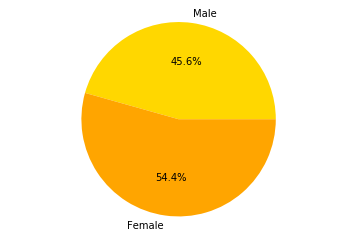

In [27]:
# Create Agewise (< 18, > 60, > 90) dataframe
fb_Male_U18 = fb_Male[fb_Male['age']<18]
fb_Female_U18 = fb_Female[fb_Female['age']<18]
fb_UD_U18 = fb_UD[fb_UD['age']<18]

# print('Users under 18\nMale {}\nFemale {}\nUD {}\n'.format(fb_Male_U18.shape[0], fb_Female_U18.shape[0], fb_UD_U18.shape[0]))

# fb_M_Under60_90 = fb_Male[(fb_Male['age'] > 60) & (fb_Male['age'] < 90)]
# fb_F_Under60_90 = fb_Female[(fb_Female['age'] > 60) & (fb_Female['age'] < 90)]
# fb_UD_Under60_90 = fb_UD[(fb_UD['age'] > 60) & (fb_UD['age'] < 90)]
# print("Users in the range of 60 to 90\nMale {}\nFemale {}\nUD {}\n".format(fb_M_Under60_90.shape[0], fb_F_Under60_90.shape[0], fb_UD_Under60_90.shape[0]))

# fb_Agewise_Outliers = fb_root[fb_root['age'] > 90].groupby(['gender'])[0,]
# fb_root[fb_root['age'] > 90].shape#.groupby(['gender'])['userid']


fb_M18to30 = fb_Male[(fb_Male['age'] > 17) & (fb_Male['age'] < 31)]
fb_M31to45 = fb_Male[(fb_Male['age'] > 31) & (fb_Male['age'] < 46)]
fb_M46to60 = fb_Male[(fb_Male['age'] > 45) & (fb_Male['age'] < 61)]

fb_F18to30 = fb_Female[(fb_Female['age'] > 17) & (fb_Female['age'] < 31)]
fb_F31to45 = fb_Female[(fb_Female['age'] > 31) & (fb_Female['age'] < 46)]
fb_F46to60 = fb_Female[(fb_Female['age'] > 45) & (fb_Female['age'] < 61)]


lblGender = ['Male', 'Female']
gendercolors = ['gold','orange']
exp = [0,0] 
plt.pie([fb_M18to30.shape[0], fb_F18to30.shape[0]], autopct='%1.1f%%',labels=lblGender,
        explode=exp,colors=gendercolors)
plt.axis('equal')
plt.show()

In [ ]:
# fb_t = fb_root[(fb_root['gender'] != 'male') & (fb_root['gender'] != 'female') ]
print("fb_root.shape {}".format(fb_root.shape),fb_t.shape)
# print(type(fb_Under18_M.shape))
# print('Users under 18 - {}  out of which Male {} - Female {} summing to {}'.format(fb_Under18.shape,fb_Under18_M.shape[0], fb_Under18_F.shape[0], fb_Under18_M.shape[0] + fb_Under18_F.shape[0]))
fb_Under18 = fb_Under18[(fb_Under18['LikesR'] != 0) & (fb_Under18['MobL'] !=0) & (fb_Under18['MobLR'] !=0) & (fb_Under18['WL'] !=0) & (fb_Under18['WLR'] !=0)]

# fb_Under18_U
# fb_t